In [41]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0


# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Build Model

In [42]:
# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train_cat, epochs=5, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", round(test_acc * 100, 2), "%")


Epoch 1/5


C:\Users\vkrishnasundar\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8671 - loss: 0.4613 - val_accuracy: 0.9611 - val_loss: 0.1357
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1136 - val_accuracy: 0.9693 - val_loss: 0.1054
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9757 - loss: 0.0785 - val_accuracy: 0.9700 - val_loss: 0.1045
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9808 - loss: 0.0580 - val_accuracy: 0.9715 - val_loss: 0.0983
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9735 - val_loss: 0.1024
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9683 - loss: 0.1095
Test Accuracy: 97.24 %


### Inputting real world image

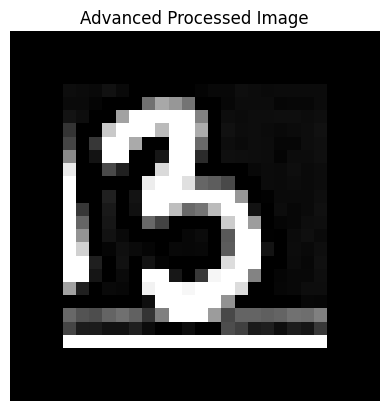

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Digit: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digit 0: 0.03% confidence
Digit 1: 3.42% confidence
Digit 2: 22.19% confidence
Digit 3: 23.41% confidence
Digit 4: 0.01% confidence
Digit 5: 50.07% confidence
Digit 6: 0.01% confidence
Digit 7: 0.10% confidence
Digit 8: 0.08% confidence
Digit 9: 0.68% confidence


In [66]:
from matplotlib import pyplot as plt
from PIL import ImageEnhance, ImageFilter, Image, ImageOps
import numpy as np


def advanced_preprocess(path):
    img = Image.open(path).convert("L")
    img = ImageOps.invert(img)

    # Enhance contrast
    img = ImageEnhance.Contrast(img).enhance(2.0)

    # Resize with high-quality resampling
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)

    # Center in a 28x28 canvas
    new_img = Image.new("L", (28, 28), 0)
    new_img.paste(img, ((28 - img.size[0]) // 2, (28 - img.size[1]) // 2))

    # Sharpen
    new_img = new_img.filter(ImageFilter.SHARPEN)

    # Display
    plt.imshow(new_img, cmap='gray')
    plt.title("Advanced Processed Image")
    plt.axis("off")
    plt.show()

    # Normalize and reshape
    arr = np.array(new_img).astype("float32") / 255.0
    arr = arr.reshape(1, 28, 28)
    return arr

# Use it
img_path = "mnt/sampleData/three2.png"
advanced_img = advanced_preprocess(img_path)

pred = model.predict(advanced_img)
print("Predicted Digit:", np.argmax(pred))

# Predict probabilities for each class
probs = model.predict(advanced_img)[0]  # shape: (10,)

# Print each class's confidence
for i, prob in enumerate(probs):
    print(f"Digit {i}: {prob * 100:.2f}% confidence")

